# tf.data 모듈
- 데이터 입력 파이프라인을 위한 모듈
    - 모델 학습/평가를 위한 데이터셋을 제공(feeding)하기 위한 모듈
   - raw dataset 에서 입력을 위한 **전처리**, **배치 크키**, **shuffling**등을 한번에 처리할 수 있게 한다.
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스들을 제공
    - 입력 소스의 제공 형태, 어떤 처리를 하는지에 따라 다양한 하위클래스들이 제공된다.

## Dataset API 사용
1. **Dataset 생성( data 끌고오기 )**
    - raw dataset을 지정 (Loading)
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스등를 사용해 메모리나 파일에 있는 데이터를 Dataset으로 만든다.
    - **from_tensor_slices()**: 메모리의 리스트, 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.

2. **제공 데이터 전처리**
    - **map(함수)**: Dataset이 제공하는 원소를 처리해서 변환된 원소를 제공하도록 한다.
        - 함수: 원소를 어떻게 변환할 지 정의한 함수를 매개변수로 전달한다.
            - 매개변수: Dataset이 제공하는 원소를 받을 변수. 
            - 반환값: Dataset이 제공한 원소를 변경처리한 값.
    - **filter(함수)**: Dataset이 제공하는 원소중 특정 조건을 만족하는(True)인 원소들만 제공한다.
        - 함수: 원소가 특정조건을 만족하는지 여부를 확인하는 로직을 정의한 함수를 매개변수로 전달한다.
            - 매개변수: Dataset이 제공하는 원소를 받을 변수.
            - 반환값: Dataset이 제공한 원소가 특정조건을 만족하는지 여부(bool)

3. **데이터 제공 설정 관련**
    - **batch(size)**: 학습/평가시 한번에 제공할 batch size 지정
        - size: int. batch size 지정
        - drop_remainder: bool. True일 경우 마지막 제공시 남은 데이터수가 batch size보다 작으면 제공하지 않는다.
    - **shuffle(buffer 크기)**: (ephos 끝낼때마다)dataset의 원소들의 순서를 섞는다. 
        - buffer 크기: int. buffer 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.
        - 데이터 사이즈가 너무 커서 메모리가 부족할 경우 버퍼크기를 적게 준다.
        - 메모리가 충분하다면 데이터의 개수와 동일하게 주면된다.
    - **repeat(count)**: 전체 데이터를 한번 다 제공한 뒤 다시 데이터를 제공한다.
        - count: 몇번 제공할지 반복 횟수
        - shuffle이 적용된 Dataset의 경우 다음 반복 제공마다 shuffle을 진행한다. (에폭단위)
        

- 각 tf.data 함수들은 각 기능에 맞게 데이터를 처리하는 Dataset 객체를 반환한다.

### Dataset 메소드
- take(개수): 지정한 개수만큼의 데이터만 제공한다.

In [2]:
import tensorflow as tf
import numpy as np

##### Tensor Type
>- TensorFlow의 기본 data 자료구조.
>- numpy가 ndarray를 이용해 데이터를 관리하듯이 tensorflow를 Tensor를 이용해 데이터를 관리한다.
>    - Tesorflow의 모델이 학습, 평가할때 사용하는 데이터셋(train dataset, validation dataset, test dataset)은 tf.Tensor 타입이어야 한다.
>        - 학습/평가(model.fit(), model.evaluate()) 할때 ndarray를 입력 데이터셋으로 넣어주면 내부적으로 tf.Tensor로 변형해서 처리.
>        - tf.Tensor는 데이터셋을 ndarray로 가지고 있다.

In [3]:
t = tf.constant([1,2,3], dtype = 'float32')
t

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [4]:
t.shape, t.dtype

(TensorShape([3]), tf.float32)

In [5]:
# Tensor ->> ndarray로 변환
a = t.numpy()
a

array([1., 2., 3.], dtype=float32)

In [6]:
# ndarray/list => Tensor
tf.constant(np.arange(10))

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [7]:
tf.convert_to_tensor(a)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

## Dataset 예제

In [8]:
# 0~9 정수 => input data
raw_data1 = np.arange(10)
raw_data1


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
# Dataset 을 생성 => 대상 raw dataset 메모리에 있는 ndarray일 때.
dataset = tf.data.Dataset.from_tensor_slices(raw_data1)
print(type(dataset))

<class 'tensorflow.python.data.ops.from_tensor_slices_op.TensorSliceDataset'>


In [10]:
# Dataset. -> iterable 타입 => for in
for data in dataset:
  print(data)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [11]:
for data in dataset.take(3):  # dataset에서 3개만 조회
  print(data)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


##### x, y 묶어서 제공
- 두개 이상의 데이터셋을 묶어서 제공할 경우 Tuple로 묶어준다.
    - Dataset이 feeding 할 때는 같은 index의 값들을 tuple로 묶어서 제공 (zip()과 동일)

In [12]:
raw_data2 = np.arange(10, 20)
print(raw_data1, len(raw_data1))   # X
print(raw_data2, len(raw_data2))   # y

[0 1 2 3 4 5 6 7 8 9] 10
[10 11 12 13 14 15 16 17 18 19] 10


In [13]:
dataset2 = tf.data.Dataset.from_tensor_slices((raw_data1, raw_data2))
for data in dataset2.take(1):    # 두 dataset(raw_data1, raw_data2)의 같은 index의 값들을 묶어서 튜플로 반환.
  print(data)

(<tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=10>)


In [14]:
for x, y in dataset2:
  print(x,y, sep='==========')

tf.Tensor(0, shape=(), dtype=int64)==========tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)==========tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)==========tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)==========tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)==========tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)==========tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)==========tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)==========tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)==========tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)==========tf.Tensor(19, shape=(), dtype=int64)


##### shuffle
- 데이터셋을 섞는다.

In [15]:
for data in dataset:
  print(data)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [16]:
raw_data1 = np.arange(10)
dataset = tf.data.Dataset.from_tensor_slices(raw_data1)
dataset3 = dataset.shuffle(3)  # dataset을 섞어준다. 데이터셋을 처음 읽을때 한번 섞는다. 
# 10: buffer size => 지정한 개수만큼만 섞는다.
print(type(dataset3))

<class 'tensorflow.python.data.ops.dataset_ops.ShuffleDataset'>


In [17]:
for data in dataset3:
  print(data)

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)


##### batch
- drop_remainder: boolean(기본-False)
    - batch로 제공할 데이터의 개수가 설정한 batch_size 보다 적으면 제공하지 않는다.
    - Train dataset을 만들때 True로 설정하여 항상 일정한 batch size로 학습할 수 있도록 한다. drop 되는 데이터는 다른 epoch을 반복할 때 사용된다.

In [18]:
dataset4 = dataset.batch(5)  # batch size 설정 => 한번에 지정한 개수만큼 제공.
print(type(dataset4)) 
for data in dataset4:
  print(data)               # 요청대로 아래 5개씩 묶어서 출력해준다. 

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int64)


In [19]:
dataset5 = dataset.batch(3, drop_remainder=True)  # drop reminder: 읽어올 데이터의 개수가 batch_size보다 적으면 제공하지 않는다.
                                                  #                => train dataset 생성할 때 설정
for data in dataset5:
  print(data)     

tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
tf.Tensor([6 7 8], shape=(3,), dtype=int64)


##### repeat

In [20]:
dataset6 = dataset.repeat(5)     # 지정한 횟수만큼 데이터를 반복해서 제공한다(default: 1 - 한번)
print(type(dataset6))
for data in dataset6:
  print(data)                  # 0~9까지 요청한 수만큼(5번) 반복해서 준다.

<class 'tensorflow.python.data.ops.dataset_ops.RepeatDataset'>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
t

In [21]:
dataset7 = tf.data.Dataset.from_tensor_slices(raw_data1).shuffle(10).batch(3).repeat(3)
for data in dataset7:                                                      #  데이터셋을 반복할 때마다 shuffle을 해준다.
  print(data)

tf.Tensor([9 8 0], shape=(3,), dtype=int64)
tf.Tensor([3 5 2], shape=(3,), dtype=int64)
tf.Tensor([6 7 1], shape=(3,), dtype=int64)
tf.Tensor([4], shape=(1,), dtype=int64)
tf.Tensor([5 7 2], shape=(3,), dtype=int64)
tf.Tensor([3 4 0], shape=(3,), dtype=int64)
tf.Tensor([6 1 8], shape=(3,), dtype=int64)
tf.Tensor([9], shape=(1,), dtype=int64)
tf.Tensor([6 5 0], shape=(3,), dtype=int64)
tf.Tensor([9 4 2], shape=(3,), dtype=int64)
tf.Tensor([1 7 3], shape=(3,), dtype=int64)
tf.Tensor([8], shape=(1,), dtype=int64)


##### map ( 일괄적 처리 )

In [22]:
dataset8 = dataset.map(lambda x: x * 2)
print(type(dataset8))
for data in dataset8:
  print(data)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)


In [23]:
# 두개의 dataset(x,y)을 묶은 Dataset객체
def map_func(x, y):
    return x**2, y   # X는 제곱, y는 그대로 반환.

dataset9 = dataset2.map(map_func)
for x, y in dataset9:
    print(x, y)

tf.Tensor(0, shape=(), dtype=int64) tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64) tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64) tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64) tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(25, shape=(), dtype=int64) tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(36, shape=(), dtype=int64) tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(49, shape=(), dtype=int64) tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(64, shape=(), dtype=int64) tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(81, shape=(), dtype=int64) tf.Tensor(19, shape=(), dtype=int64)


##### filter( 원하는 값만 처리 )

In [24]:
def filter_func(x):
  return x % 2 ==0    # 2의 배수: True

dataset11 = dataset.filter(filter_func)
print(type(dataset11))
for data in dataset11:
  print(data)

<class 'tensorflow.python.data.ops.filter_op.FilterDataset'>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


# 문제 유형별 MLP 네트워크
- MLP(Multi Layer Perceptron),  ANN(artificial Neural Network),  DNN(Deep Neural Network)
    - Fully Connected Layer로 구성된 네트워크

In [25]:
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


# Regression(회귀)

## Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율
<br><br>
- **Target**
    - MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import random

In [27]:
# random seed 값 설정
tf.random.set_seed(0)
np.random.seed(0)
random.seed(0)

##### 데이터 로딩

In [28]:
(train_X, y_train), (test_X, y_test) = keras.datasets.boston_housing.load_data()
print(train_X.shape, y_train.shape)
print(test_X.shape, y_test.shape)

57026/57026 [==============================] - 0s 0us/step
(404, 13) (404,)
(102, 13) (102,)


In [29]:
# y -> MinmaxScaling => 0~1 output Layer의 activation을 sigmoid

In [30]:
print(train_X[0])
print(y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


##### 하이퍼파라미터, 변수 정의

In [31]:
# 하이퍼파라미터 변수
# 학습율 => 경사하강법에서 구한 gradient(경사_미분계수)에 곱해주는 값으로 0~1 사이 실수를 지정한다.
          # (optimizer 생성 때 설정)
LEARNING_RATE = 0.001  
N_EPOCH = 200 # 에폭수
N_BATCH = 400 # Train배치사이즈
N_BATCH_VAL = 50 #Validation / evaluation 배치 사이즈 ==> 교차검증 데이터 수.


##### X, y 전처리
- MLP는 선형모델을 기반으로 하므로 Feature scaling을 해준다.

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)



In [33]:
X_train.mean(), X_train.std()

(2.6016254395785847e-15, 0.9999999999999993)

In [34]:
# 회귀: y 는 그대로 사용.

##### Dataset 생성

- validation/test set의 pipe line은 동일하게 구성한다.
- train dataset은 shuffle을 추가하고 batch에 drop_remainder=True를 설정한다.
- map, filter 를 pipe line에 추가할 경우 train/validation/test set에 모두 동일하게 적용한다.

In [35]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
                                .shuffle(X_train.shape[0]) \
                                .batch(N_BATCH, drop_remainder=True) #drop: 계산하지 않는 나머지 짜투리는 버려라

test_dataset =  tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCH_VAL)
# test/Valisation set은 1. shuffle 하지 않는다. (평균 결과로 평가하기 때문에)
#                       2. batch -> drop_remainder=False(기본)으로 설정.

In [36]:
print('에폭당 step수:', len(train_dataset))
print('에폭당 step수:', len(test_dataset))


에폭당 step수: 1
에폭당 step수: 3


In [37]:
X_test.shape

(102, 13)

##### 모델 구현

1. 모델 객체 생성 - Sequential
2. 모델에 Layer들 추가
    - Input Layer 추가
        - 입력 데이터의 shape을 지정한다.
        1. InputLayer 객체를 생성해서 추가한다.
        2. 첫번째 Hidden Layer에 input_shape 매개변수에 shape을 지정하여 추가한다.
    - Hidden Layer들 추가
        - Layer의 개수와 Layer의 Unit의 개수는 튜닝대상으로 성능에 영향을 준다.
        - 활성함수는 ReLU 를 사용한다.
        - Layer의 개수와 Unit 개수가 많을 수록 복잡한 모델, 적을 수록 단순한 모델이된다.
    - Output Layer 추가
        - 풀려는 문제에 따라 unit개수와 활성함수를 지정한다.

In [42]:
def get_model_boston(lr=0.01):
    model = keras.Sequential()
    # 첫번째 hidden layer에 input shape을 지정하고 InputLayer 추가를 생략.
    # Activation 함수 Layer(layers.ReLU())는 Dense Layer 생성시 activation 속성에 추가 가능.
    model.add(layers.Dense(units=32, activation='relu', input_shape=(13, )))
    model.add(layers.Dense(units=16, activation='relu'))
    model.add(layers.Dense(units=8, activation='relu'))
    
    # 회귀 output layer: unit개수-예측하려는 값의 개수.  
    #            활성함수 - 보통: None. 값의 범위를 맞추기 위해 logistic함수(sigmoid-0~1)나 tanh(-1~1)을 사용할 수 있다.
    # y: 1개(집값의 중위수)
    model.add(layers.Dense(units=1)) #activation : None
    
    # 컴파일
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), # default값으로 생성된 것을 사용할 경우 문자열로 지정.
                  loss='mse')                                        # optimizer, loss 기본으로 들억야 한다./회귀는 mse로 지정.
    return model

In [43]:
# model_boston = get_model_boston(LEARNING_RATE)
model_boston = get_model_boston()
# 딥러닝 모델의 구조 확인
model_boston.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [44]:
# 유닛당 파라미터(weight, bias) 개수
# 입력 feature개수(weight수) + 1(bias)

# 첫번째 layer의 파라미터 수
# 입력 feature: 13 (input_shape), units: 32
(13+1)*32

448

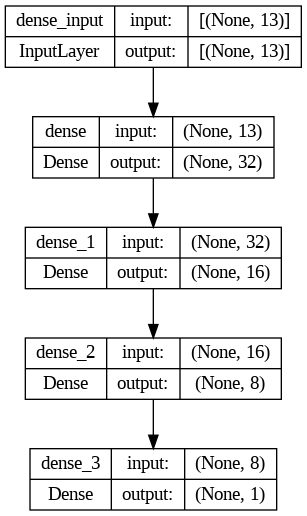

In [45]:
keras.utils.plot_model(model_boston, show_shapes=True)

##### 학습(Train)

In [46]:
# train_dataset 생성->X, y를 제공
hist = model_boston.fit(train_dataset, ### (X_train, y_train) + shuffle + batch_size
                        epochs=N_EPOCH, 
                        validation_data=test_dataset   # Dataset을 이용할 경우 validation_split을 사용할 수 없다.
                        )

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 592.7670 - val_loss: 610.8076
Epoch 2/200
1/1 [==============================] - 0s 34ms/step - loss: 582.2698 - val_loss: 603.5632
Epoch 3/200
1/1 [==============================] - 0s 26ms/step - loss: 577.4246 - val_loss: 595.2667
Epoch 4/200
1/1 [==============================] - 0s 25ms/step - loss: 567.7039 - val_loss: 585.6584
Epoch 5/200
1/1 [==============================] - 0s 33ms/step - loss: 556.3108 - val_loss: 574.2402
Epoch 6/200
1/1 [==============================] - 0s 25ms/step - loss: 545.1740 - val_loss: 560.7397
Epoch 7/200
1/1 [==============================] - 0s 23ms/step - loss: 533.4029 - val_loss: 544.5043
Epoch 8/200
1/1 [==============================] - 0s 27ms/step - loss: 517.2044 - val_loss: 525.4391
Epoch 9/200
1/1 [==============================] - 0s 24ms/step - loss: 499.3380 - val_loss: 502.7788
Epoch 10/200
1/1 [==============================] - 0s 26ms/step - loss: 470.5678 - 

##### 결과 시각화
- 학습 시 epoch별 검증 결과를 시각화한다.

In [47]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text

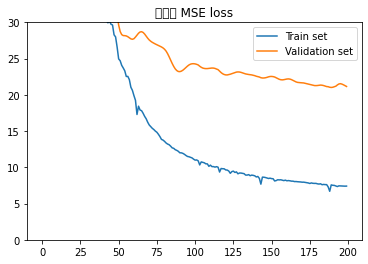

In [48]:
# hist.history : 에폭별 검증 결과
# hist.epoch : 에폭리스트
plt.plot(hist.epoch, hist.history['loss'], label='Train set')
plt.plot(hist.epoch, hist.history['val_loss'], label='Validation set')

plt.title('에폭별 MSE loss')
plt.ylim(0, 30)
plt.legend()
plt.show()

##### 최종 테스트

In [49]:
loss = model_boston.evaluate(test_dataset)

3/3 [==============================] - 0s 7ms/step - loss: 21.1566


##### 모델 네트워크 저장

In [50]:
import os
path = 'saved_model'
os.makedirs(path, exist_ok=True)

In [51]:
saved_dir = os.path.join(path, 'boston_model')
print(saved_dir)
model_boston.save(saved_dir)

saved_model/boston_model


##### 새로운 데이터 추론

In [52]:
# 저장된 모델을 불러와서 추론
saved_model = keras.models.load_model(saved_dir)
saved_model.evaluate(test_dataset)

3/3 [==============================] - 0s 6ms/step - loss: 21.1566


21.1566219329834

In [53]:
X_new = X_test[:5]
pred = saved_model.predict(X_new)
print(pred)

1/1 [==============================] - 0s 129ms/step
[[ 8.155615]
 [19.217352]
 [21.872103]
 [35.54864 ]
 [25.270071]]


In [54]:
y_test[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

# 분류 (Classification)

## Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

이미지는 28x28 크기이며 Gray scale이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)들이다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

import numpy as np
import matplotlib.pyplot as plt

import os
import random

#seed 값 설정
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [56]:
class_names = np.array(['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

##### Data 로딩

In [57]:
(train_image, y_train), (test_image, y_test) = keras.datasets.fashion_mnist.load_data()
train_image.shape, y_train.shape, test_image.shape, y_test.shape
# 60000개의 이미지가 있으며, 각 이미지의 크기는 28 x 28 픽셀
# 60000개의 정답(라벨) 데이터가 있으며, 이 데이터는 1차원 배열로 구성
# 10000개의 이미지가 있으며, 각 이미지의 크기는 28 x 28 픽셀이라는 의미
# 10000개의 정답(라벨) 데이터가 있으며, 이 데이터는 1차원 배열로 구성

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [58]:
np.unique(y_train, return_counts=True)
# 위 결과에서는 y_train 배열에 0부터 9까지의 숫자가 모두 포함되어 있으며, 
# 각각의 숫자가 6000번씩 등장하는 것을 알 수 있습니다. 
# 이는 Fashion MNIST 데이터셋에서 10개의 카테고리
# (예: 티셔츠, 바지, 스웨터, 드레스 등)가 각각 6000개씩 존재하기 때문입니다. 
# 이러한 정보는 데이터셋을 분석하고 이해하는 데 유용합니다.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

##### validatation dataset set  분리
- Train set을 Train/validation set으로 분리

In [59]:
from sklearn.model_selection import train_test_split
train_image, val_image, y_train, y_val = train_test_split(train_image, y_train, test_size=0.2, 
                                                          stratify=y_train, random_state=0)

train_image.shape, val_image.shape

((48000, 28, 28), (12000, 28, 28))

##### 이미지 확인

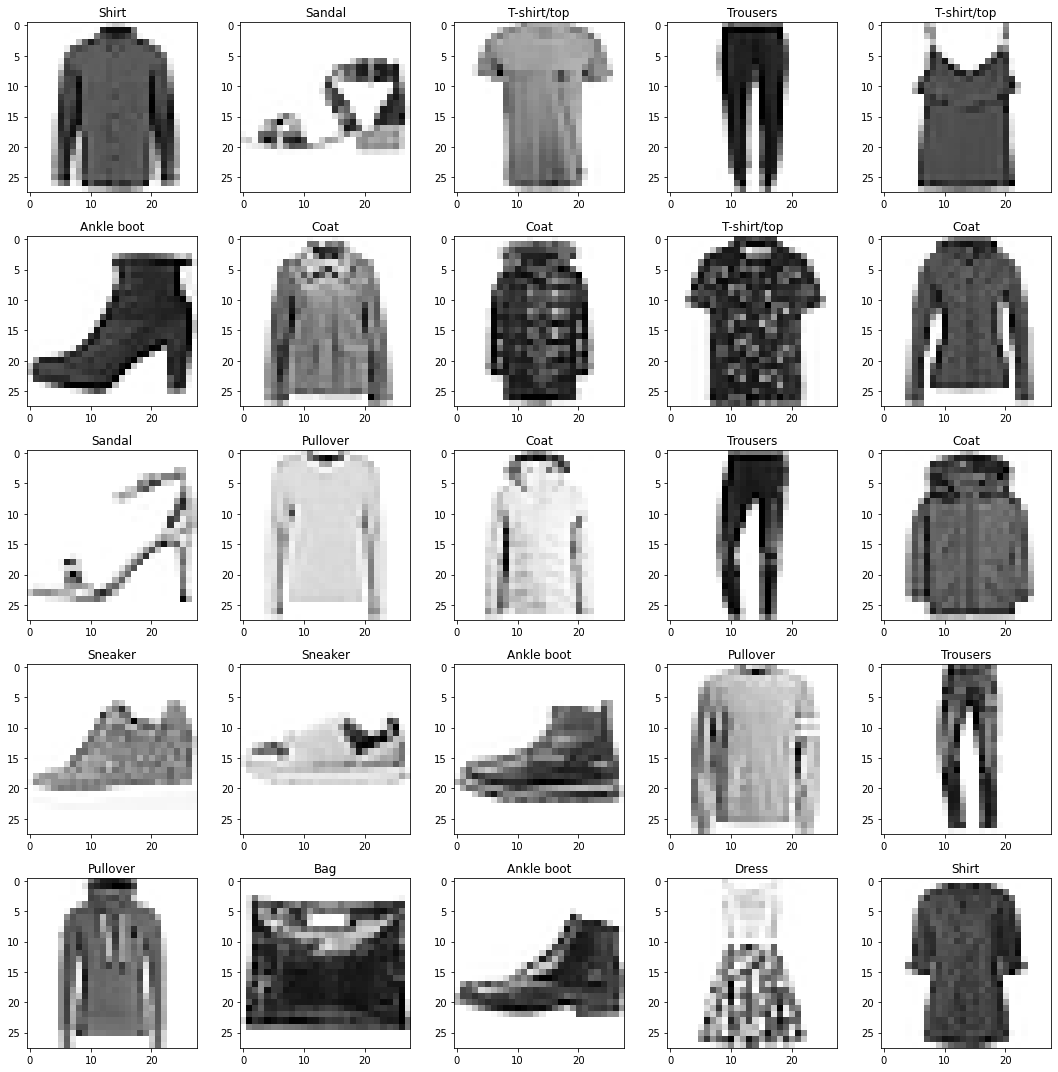

In [60]:
cnt = 25 # 확인할 이미지 개수 (5배수)
plt.figure(figsize=(15,15))
for i in range(cnt):
  plt.subplot(5, int(cnt/5), i+1)
  plt.imshow(train_image[i], cmap='Greys') #cmap='gray' / gray: 0~black, 255: white,// greys: 0~white, 255: black
  label= class_names[y_train[i]]
  plt.title(label)

plt.tight_layout()
plt.show()

#### 하이퍼파라미터, 변수 설정

In [61]:
LEARNING_RATE = 0.001 # 학습률
N_EPOCH = 100         # 에폭수
N_BATCH = 1000        # 배치 사이즈 수

#### X, y  전처리
- y값 처리
    - 1. 다중 분류에서 label encoding 형식의 label을 one hot encoding 처리 ==> loss: categoricl_crossentropy로 바꾸면 됨.
    - 2. (or) label encoding 형식의 label을 그대로 모델에 전달 => loss: sparse_categorail_crossentropy
         - one hot encoding 처리를 loss가 대신 한다.

In [62]:
y_train # => one hot encoding 해야함.
        # 2번 방식을 사용.(y를 그대로 유지)

array([6, 5, 0, ..., 7, 4, 9], dtype=uint8)

- x값(이미지) 처리
    - dtype을 uint8에서 float32로 변환한다.
    - 0 ~ 1 정규화. X/255.0으로 나눈다.

In [63]:
X_train = train_image.astype('float32')/255.0     # 보통 float32를 많이 사용한다.
X_val = val_image.astype('float32')/255.0
X_test = test_image.astype('float32')/255.0


In [64]:
print(train_image.min(), train_image.max())
print(X_train.min(), X_train.max())


0 255
0.0 1.0


In [65]:
X_train.shape, X_val.shape, X_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

##### Dataset 생성

In [66]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                                .shuffle(X_train.shape[0]).batch(N_BATCH, drop_remainder=True)

# validation/test dataset을 동일한 구조로 생성한다.
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(N_BATCH)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCH)

In [67]:
# 에폭당 step 수 계산
len(train_dataset), len(val_dataset), len(test_dataset)

(48, 12, 10)

##### 모델 생성 및 컴파일

In [68]:
def get_model_fashion(lr=0.01):
  model = keras.Sequential()
  # Hidden Layer (첫번째  Hidden Layer에 input shape을 지정)
  model.add(layers.Flatten(input_shape=(28, 28)))  # 28 x 28 2차원배열 => 784, 1차원 배열로 flatten
   
  # Dense Layer의 Unit 개수는 점점 줄여나가는 패턴을 사용한다.
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))

  # output Layer
  # 다중 분류 : unit 수 - y의  class 개수, activation: softmax -> 각 출력 값이 class별 확률이 되도록 처리. 
  model.add(layers.Dense(10, activation='softmax', name='output'))

  # 컴파일
  # y가 one hot encoding이 안된 경우 loss 함수를 -> sparse_categorical_crossentropy 사용
  # y가 one hot encoding이 된 경우 loss 함수를 -->  categorical_crossentropy
  model.compile(optimizer=optimizers.Adam(learning_rate=lr), 
                  loss='sparse_categorical_crossentropy',   
                  metrics=['accuracy']
                 )
  return model

In [69]:
model_fashion = get_model_fashion(LEARNING_RATE)
model_fashion.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-tr

##### Train(학습)

In [70]:
hist = model_fashion.fit(train_dataset, epochs=N_EPOCH, validation_data=val_dataset)

Epoch 1/100
48/48 [==============================] - 5s 73ms/step - loss: 1.0248 - accuracy: 0.6647 - val_loss: 0.6009 - val_accuracy: 0.7933
Epoch 2/100
48/48 [==============================] - 2s 38ms/step - loss: 0.5066 - accuracy: 0.8295 - val_loss: 0.4768 - val_accuracy: 0.8303
Epoch 3/100
48/48 [==============================] - 2s 35ms/step - loss: 0.4376 - accuracy: 0.8488 - val_loss: 0.4193 - val_accuracy: 0.8519
Epoch 4/100
48/48 [==============================] - 2s 35ms/step - loss: 0.3977 - accuracy: 0.8617 - val_loss: 0.3907 - val_accuracy: 0.8607
Epoch 5/100
48/48 [==============================] - 2s 38ms/step - loss: 0.3834 - accuracy: 0.8651 - val_loss: 0.3897 - val_accuracy: 0.8577
Epoch 6/100
48/48 [==============================] - 5s 91ms/step - loss: 0.3637 - accuracy: 0.8707 - val_loss: 0.3637 - val_accuracy: 0.8669
Epoch 7/100
48/48 [==============================] - 4s 77ms/step - loss: 0.3392 - accuracy: 0.8795 - val_loss: 0.3590 - val_accuracy: 0.8681
Epoch 

##### 결과 시각화
- 학습 시 epoch별 검증 결과를 시각화한다.

In [71]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [74]:
hist.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

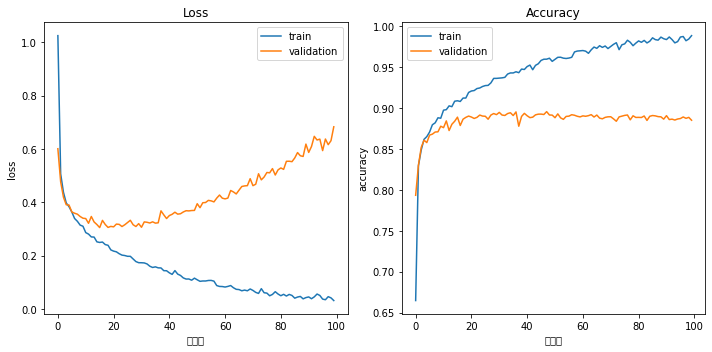

In [75]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.epoch, hist.history['loss'], label="train")
plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('에폭수')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.epoch, hist.history['accuracy'], label='train')
plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('에폭수')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [76]:
model_fashion2 = get_model_fashion(LEARNING_RATE)  
hist = model_fashion2.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
48/48 [==============================] - 6s 66ms/step - loss: 0.9068 - accuracy: 0.6939 - val_loss: 0.5439 - val_accuracy: 0.8076
Epoch 2/20
48/48 [==============================] - 4s 81ms/step - loss: 0.4872 - accuracy: 0.8299 - val_loss: 0.4551 - val_accuracy: 0.8372
Epoch 3/20
48/48 [==============================] - 4s 66ms/step - loss: 0.4266 - accuracy: 0.8494 - val_loss: 0.4114 - val_accuracy: 0.8536
Epoch 4/20
48/48 [==============================] - 2s 35ms/step - loss: 0.3909 - accuracy: 0.8633 - val_loss: 0.3960 - val_accuracy: 0.8572
Epoch 5/20
48/48 [==============================] - 2s 37ms/step - loss: 0.3607 - accuracy: 0.8725 - val_loss: 0.3652 - val_accuracy: 0.8681
Epoch 6/20
48/48 [==============================] - 2s 38ms/step - loss: 0.3520 - accuracy: 0.8750 - val_loss: 0.3589 - val_accuracy: 0.8690
Epoch 7/20
48/48 [==============================] - 5s 93ms/step - loss: 0.3337 - accuracy: 0.8811 - val_loss: 0.3519 - val_accuracy: 0.8731
Epoch 8/20
48

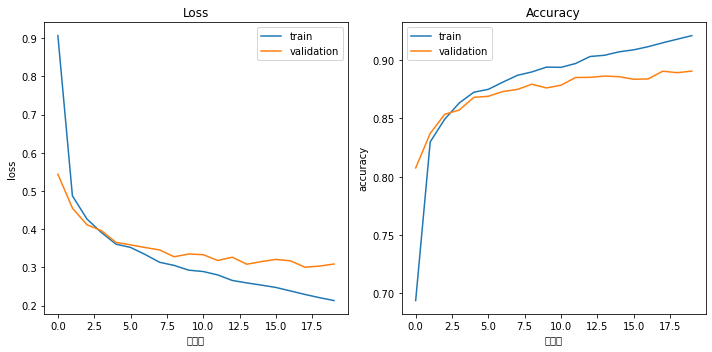

In [77]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.epoch, hist.history['loss'], label="train")
plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('에폭수')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.epoch, hist.history['accuracy'], label='train')
plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('에폭수')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### 최종평가

In [80]:
# test set
loss, acc = model_fashion2.evaluate(test_dataset)


10/10 [==============================] - 0s 25ms/step - loss: 0.3384 - accuracy: 0.8781


In [81]:
print(loss, acc, sep=" , ")

0.338417649269104 , 0.8780999779701233


#### 모델저장

In [82]:
save_dir_fashion = 'saved_model/fashion_mnist_model'

In [83]:
model_fashion2.save(save_dir_fashion)

#### 새로운 데이터 추론

In [84]:
# 저장된 모델을 loading해서 추론
saved_model_fashion = models.load_model(save_dir_fashion)
saved_model_fashion.evaluate(test_dataset)

10/10 [==============================] - 0s 25ms/step - loss: 0.3384 - accuracy: 0.8781


[0.338417649269104, 0.8780999779701233]

In [85]:
new_X = X_test[1000:1010]
new_X.shape

(10, 28, 28)

In [86]:
pred = saved_model_fashion.predict(new_X)
pred.shape

1/1 [==============================] - 0s 136ms/step


(10, 10)

In [87]:
pred

array([[1.61198154e-01, 5.86025180e-07, 4.82020667e-03, 1.57843856e-03,
        2.69822995e-05, 7.84082799e-11, 8.32127035e-01, 3.14176773e-08,
        2.46685144e-04, 1.77093261e-06],
       [1.82342683e-05, 4.93877053e-07, 5.62324658e-06, 9.99892890e-01,
        2.61785099e-05, 5.98559674e-11, 5.42051239e-05, 4.69225396e-12,
        2.26530301e-06, 5.04940196e-08],
       [3.16682458e-10, 9.05785835e-10, 1.64004827e-08, 1.15179944e-06,
        3.89983429e-13, 9.99978721e-01, 1.84974610e-07, 1.00069508e-06,
        5.88614574e-12, 1.87846690e-05],
       [1.49930329e-11, 5.68648850e-10, 1.55133080e-08, 5.21860812e-08,
        1.14653023e-10, 9.99999821e-01, 1.05840217e-08, 8.76651640e-09,
        1.21097021e-10, 3.93783033e-08],
       [7.29934371e-04, 3.01027321e-04, 3.66442829e-01, 3.53065290e-04,
        1.47232518e-01, 3.07227833e-06, 4.84712154e-01, 1.49344692e-06,
        1.53520843e-04, 7.04063132e-05],
       [1.37025537e-02, 2.26476789e-03, 1.10188931e-01, 2.63637811e-01,
   

In [88]:
# 모델 추론결과에 대한 후처리 작업
label = np.argmax(pred, axis=-1)# label 값을 조회
label_name = class_names[label]
proba = np.max(pred, axis=-1)    # 얼마 확률로 label을 추론했는지 확률값 조회
label,  label_name, proba*100

(array([6, 3, 5, 5, 6, 4, 5, 9, 6, 3]),
 array(['Shirt', 'Dress', 'Sandal', 'Sandal', 'Shirt', 'Coat', 'Sandal',
        'Ankle boot', 'Shirt', 'Dress'], dtype='<U11'),
 array([83.2127  , 99.98929 , 99.99787 , 99.999985, 48.471214, 54.834526,
        99.99984 , 99.89915 , 89.9826  , 98.84898 ], dtype=float32))

In [89]:
for idx, (n, p) in enumerate(zip(label_name, proba), start=1):
    print(f"{idx}. {n} - {int(p*100)}%")

1. Shirt - 83%
2. Dress - 99%
3. Sandal - 99%
4. Sandal - 99%
5. Shirt - 48%
6. Coat - 54%
7. Sandal - 99%
8. Ankle boot - 99%
9. Shirt - 89%
10. Dress - 98%


In [90]:
class_names[y_test[1000:1010]]

array(['T-shirt/top', 'Dress', 'Sandal', 'Sandal', 'Shirt', 'T-shirt/top',
       'Sandal', 'Ankle boot', 'Shirt', 'Dress'], dtype='<U11')

## 위스콘신 유방암 데이터셋 - 이진분류(Binary Classification) 문제

- **이진 분류 문제 처리 모델의 두가지 방법**
    1. positive(1)일 확률을 출력하도록 구현
        - output layer: units=1, activation='sigmoid'
        - loss: binary_crossentropy
    2. negative(0)일 확률과 positive(1)일 확률을 출력하도록 구현 => 다중분류 처리 방식으로 해결
        - output layer: units=2, activation='softmax', y(정답)은 one hot encoding 처리
        - loss: categorical_crossentropy
        
- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)

In [91]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

##### 데이터 로딩, train/validation/test set 나누기

In [92]:
X, y = load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [93]:
np.unique(y)

array([0, 1])

In [94]:
# Test set 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

#train . validation  분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.2,stratify=y_train, random_state=0)

In [95]:
X_train.shape, X_val.shape, X_test.shape

((364, 30), (91, 30), (114, 30))

#### 하이퍼파라미터, 변수 정의

In [96]:
LEARNING_RATE = 0.001 # 학습률
N_EPOCH = 200         # 에폭수
N_BATCH = 100        # 배치 사이즈 수
N_BATCH_VAL_TEST = 50

#### 데이터 전처리
- y (label) 처리
    - 이진 분류
        - 양성의 확률을 출력하도록 모델을 구성하는 경우 그대로 사용.
        - 양성일 확률, 음성일 확률을 출력하도록 모델을 구성하는 경우(다중분류 방식으로 처리) one hot encoding 처리한다.
- X (feature) 처리
    - 문자열(범주형): one hot encoding
    - 연속형(수치형): feature scaling

In [97]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

#### Dataset 생성


In [98]:
train_size = X_train_scaled.shape[0]
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train))\
                               .shuffle(train_size).batch(N_BATCH, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCH_VAL_TEST)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCH_VAL_TEST)

#### model 생성, 컴파일

In [100]:
X_train_scaled.shape

(364, 30)

In [101]:
from tensorflow.keras.metrics import Recall, Precision
def get_model_cancer(lr=0.01):
    model = keras.Sequential()
    #Hidden layer
    model.add(layers.Dense(32, activation='relu', input_shape=(30, )))
    model.add(layers.Dense(16, activation='relu'))
    # Output Layer
    # 이진분류(양성인가?): unit개수-1개(positive-양성- 확률), activation: "sigmoid"
    model.add(layers.Dense(1, activation='sigmoid', name='output_layer'))  # Layer이름 규칙: 변수명 규칙과 동일
    
    # 컴파일 - 이진분류의 loss함수: binary_crossentropy
    model.compile(optimizer=optimizers.Adam(learning_rate=lr), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy', Recall()])
    
    return model
    

In [103]:
model_cancer = get_model_cancer(LEARNING_RATE)
model_cancer.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                992       
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


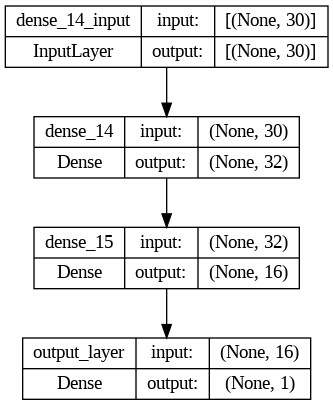

In [104]:
keras.utils.plot_model(model_cancer, show_shapes=True, to_file='model_cancer.png')

#### Train(학습)

In [105]:
hist = model_cancer.fit(train_dataset, epochs=N_EPOCH, validation_data=val_dataset)

Epoch 1/200
3/3 [==============================] - 1s 122ms/step - loss: 0.6310 - accuracy: 0.6333 - recall_1: 1.0000 - val_loss: 0.5947 - val_accuracy: 0.6374 - val_recall_1: 1.0000
Epoch 2/200
3/3 [==============================] - 0s 11ms/step - loss: 0.5830 - accuracy: 0.6500 - recall_1: 1.0000 - val_loss: 0.5505 - val_accuracy: 0.6593 - val_recall_1: 1.0000
Epoch 3/200
3/3 [==============================] - 0s 23ms/step - loss: 0.5454 - accuracy: 0.6300 - recall_1: 1.0000 - val_loss: 0.5110 - val_accuracy: 0.7143 - val_recall_1: 1.0000
Epoch 4/200
3/3 [==============================] - 0s 18ms/step - loss: 0.4880 - accuracy: 0.6700 - recall_1: 1.0000 - val_loss: 0.4752 - val_accuracy: 0.7253 - val_recall_1: 0.9825
Epoch 5/200
3/3 [==============================] - 0s 15ms/step - loss: 0.4439 - accuracy: 0.7067 - recall_1: 1.0000 - val_loss: 0.4418 - val_accuracy: 0.7473 - val_recall_1: 0.9825
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 0.4302 - accuracy

#### 결과 시각화

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

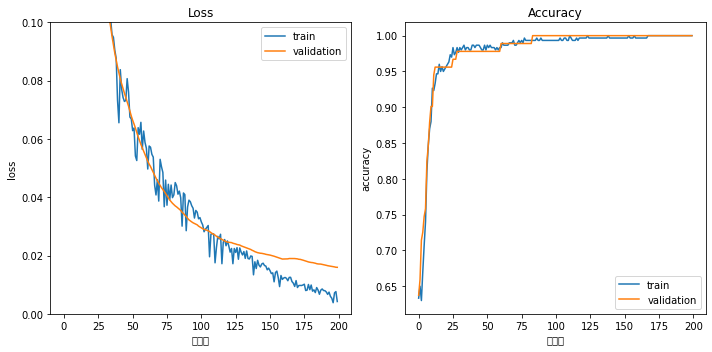

In [106]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.epoch, hist.history['loss'], label="train")
plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.ylim(0, 0.1)
plt.xlabel('에폭수')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.epoch, hist.history['accuracy'], label='train')
plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('에폭수')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### 최종평가

In [107]:
loss, acc, recall = model_cancer.evaluate(test_dataset)
print(loss, acc, recall)

3/3 [==============================] - 0s 11ms/step - loss: 0.1879 - accuracy: 0.9561 - recall_1: 0.9722
0.18794547021389008 0.9561403393745422 0.9722222089767456


#### 모델저장

In [108]:
save_dir_path = 'saved_model/cancer_model'

In [109]:
model_cancer.save(save_dir_path)

#### 새로운 데이터 추론

In [110]:
saved_model = get_model_cancer(LEARNING_RATE)
saved_model.evaluate(test_dataset)

3/3 [==============================] - 1s 10ms/step - loss: 0.6594 - accuracy: 0.6491 - recall_2: 0.6806


[0.6594444513320923, 0.6491228342056274, 0.6805555820465088]

In [111]:
saved_model = models.load_model(save_dir_path)
saved_model.evaluate(test_dataset)

3/3 [==============================] - 0s 7ms/step - loss: 0.1879 - accuracy: 0.9561 - recall_1: 0.9722


[0.18794547021389008, 0.9561403393745422, 0.9722222089767456]

In [112]:
new_X = X_test_scaled[:10]
pred = saved_model.predict(new_X)
pred.shape

1/1 [==============================] - 0s 106ms/step


(10, 1)

In [113]:
print(pred)
print(np.round(pred, 3))

[[2.87968520e-04]
 [1.09794215e-14]
 [4.24580867e-05]
 [9.99962270e-01]
 [2.34200808e-04]
 [9.99267697e-01]
 [8.79961954e-05]
 [9.99988198e-01]
 [9.99999940e-01]
 [9.87997809e-11]]
[[0.   ]
 [0.   ]
 [0.   ]
 [1.   ]
 [0.   ]
 [0.999]
 [0.   ]
 [1.   ]
 [1.   ]
 [0.   ]]


##### 모델출력결과 후처리

In [114]:
np.where(pred >= 0.5, '양성종양 - 1', '악성종양 - 0')

array([['악성종양 - 0'],
       ['악성종양 - 0'],
       ['악성종양 - 0'],
       ['양성종양 - 1'],
       ['악성종양 - 0'],
       ['양성종양 - 1'],
       ['악성종양 - 0'],
       ['양성종양 - 1'],
       ['양성종양 - 1'],
       ['악성종양 - 0']], dtype='<U8')

In [115]:
y_test[:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0])